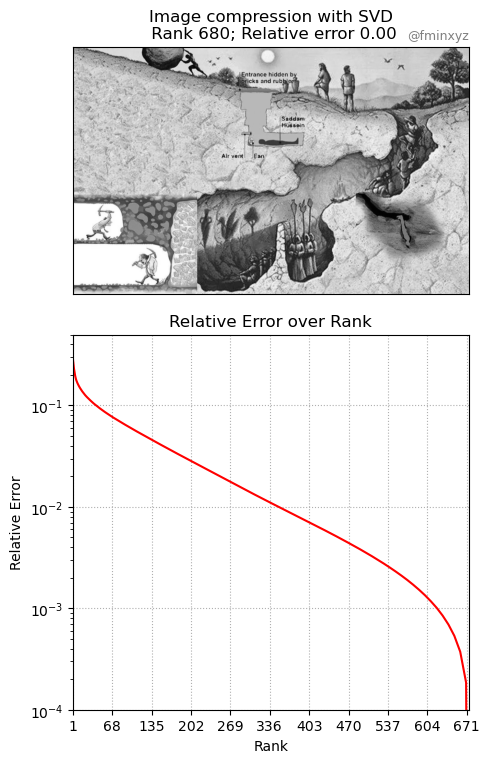

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import numpy as np
from skimage import io, color
import requests
from io import BytesIO

def download_image(url):
    response = requests.get(url)
    img = io.imread(BytesIO(response.content))
    return color.rgb2gray(img) 

def update_plot(i, img_plot, error_plot, U, S, V, original_img, errors, ranks, ax1, ax2):
    if i < 70:
        rank = i + 1
    else:
        rank = 70 + (i - 69) * 10


    reconstructed_img = U[:, :rank] @ np.diag(S[:rank]) @ V[:rank, :]

    relative_error = np.linalg.norm(original_img - reconstructed_img) / np.linalg.norm(original_img)
    errors.append(relative_error)
    ranks.append(rank)

    img_plot.set_data(reconstructed_img)
    ax1.set_title(f"Image compression with SVD\n Rank {rank}; Relative error {relative_error:.2f}")

    ax1.set_xticks([])
    ax1.set_yticks([])

    error_plot.set_data(ranks, errors)
    ax2.set_xlim(1, len(S))
    ax2.grid(linestyle=":")
    ax2.set_ylim(1e-4, 0.5)
    ax2.set_ylabel('Relative Error')
    ax2.set_xlabel('Rank')
    ax2.set_title('Relative Error over Rank')
    ax2.semilogy()

    ax2.set_xticks(range(1, len(S)+1, max(len(S)//10, 1)))
    plt.tight_layout()

    return img_plot, error_plot


def create_animation(image, filename='svd_animation.mp4'):
    U, S, V = np.linalg.svd(image, full_matrices=False)
    errors = []
    ranks = []

    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(5, 8))
    img_plot = ax1.imshow(image, cmap='gray', animated=True)
    error_plot, = ax2.plot([], [], 'r-', animated=True)

    ax1.text(1, 1.02, '@fminxyz', transform=ax1.transAxes, color='gray', va='bottom', ha='right', fontsize=9)

    initial_frames = list(range(70))
    subsequent_frames = list(range(70, len(S), 10))
    frames = initial_frames + subsequent_frames

    ani = animation.FuncAnimation(fig, update_plot, frames=len(frames), fargs=(img_plot, error_plot, U, S, V, image, errors, ranks, ax1, ax2), interval=50, blit=True)
    ani.save(filename, writer='ffmpeg', fps=8, dpi=300)

url = "https://i.redd.it/gk2v3t1hnryc1.png"

image = download_image(url)
create_animation(image)